# test-15

19 gen 2025

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def make_plots(file_name,reference_file_name=None):
  data = pd.read_csv(file_name)
  pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
  print(data)

  if reference_file_name is not None:
    reference_data = pd.read_csv(reference_file_name)

  plt.figure(figsize=(13, 6))  # Adjust the figure size for two plots

  plt.subplot(1, 2, 1)  # Second subplot (bottom)
  plt.loglog(data['DoFs'], data['ex POINT err'],"r-+", linewidth=1.0, label='Exact Error')
  plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=1.0, label='Estimated Error')
  if reference_file_name is not None:
    plt.loglog(reference_data['DoFs'], reference_data['ex POINT err'],"b:+", linewidth=0.5, label='GlobRef exact error (Reference)')
  plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
  plt.ylabel('Error', fontsize=12)
  plt.title('Exact vs Estimated POINT error', fontsize=14)
  plt.legend()
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  plt.subplot(1, 2, 2)  # First subplot (top)
  plt.loglog(data['DoFs'], data['ex POINT err'], "r-+", linewidth=0.5, label='Exact Error')
  plt.loglog(data['DoFs'], abs(data['ex POINT err']-data["est err"]),"y-+", linewidth=0.5, label='Error in [computed value + estimated error]')
  plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
  plt.title('Exact error and residual', fontsize=14)
  plt.legend()
  plt.grid(True, which="both", linestyle='--', linewidth=0.5)

  # Adjust layout and show the plots
  plt.tight_layout()
  plt.show()

## Manifold only on boundary
Config 1 to 4

config-1 is globref and is only a table

### config-2

GlobRef of circular-step14

   cycle  cells   DoFs     ex POINT err               L2               H1  \
0      0     48     72 8.3787785397e-04 9.6683253800e-03 1.1278931218e-01   
1      1    192    240 2.1372078621e-04 2.4696113553e-03 5.6924811530e-02   
2      2    768    864 5.3048252294e-05 6.2049826073e-04 2.8524248265e-02   
3      3   3072   3264 1.3271861107e-05 1.5530949854e-04 1.4269541203e-02   
4      4  12288  12672 3.3194520620e-06 3.8838619994e-05 7.1356766733e-03   

      std FLUX err          est err   Cons. FLUX err  
0 3.8822856765e-01 3.4466346643e-04 4.8528600000e-01  
1 6.3299497380e-01 9.7647770331e-05 7.1120000000e-01  
2 7.6834128596e-01 2.5396889180e-05 8.1551600000e-01  
3 8.3986228322e-01 6.5217182700e-06 8.6557300000e-01  
4 8.7667740703e-01 1.6519198250e-06 8.9007900000e-01  


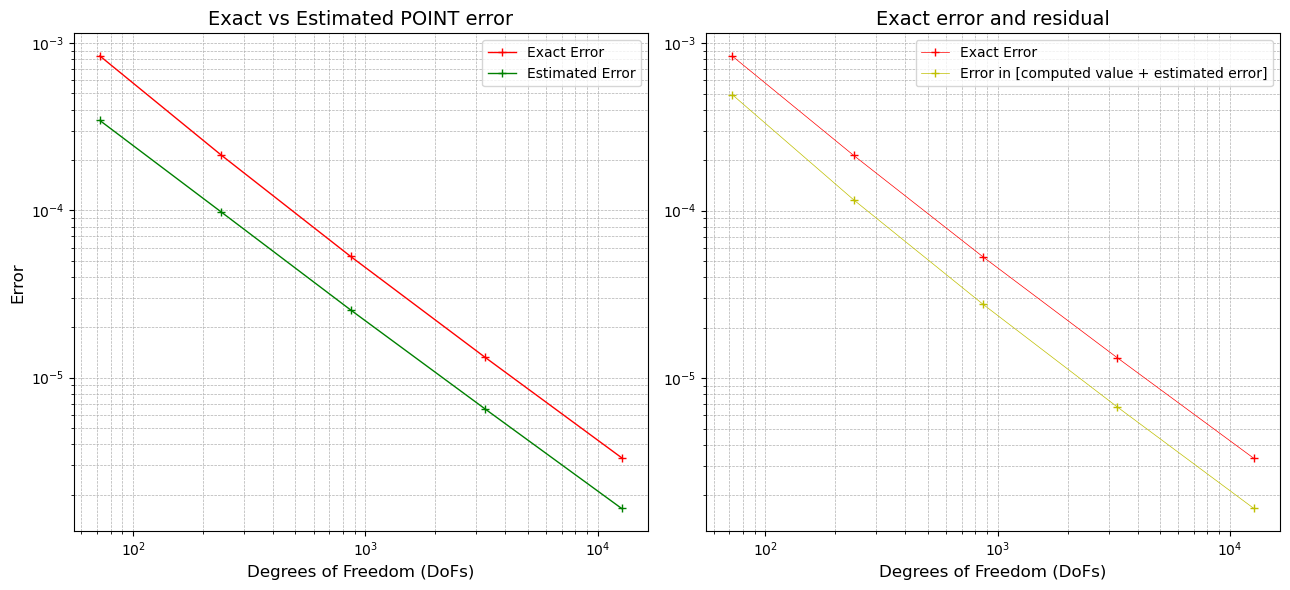

In [19]:
make_plots("./results/config-2/convergence_results.csv")

### config-3

GO circular step-14

   cycle  cells   DoFs     ex POINT err               L2               H1  \
0      0     48     72 8.3787785397e-04 9.6683253800e-03 1.1278931218e-01   
1      1     84    116 4.2872752370e-04 8.4874142851e-03 1.0308467714e-01   
2      2    180    226 3.2225598646e-04 7.9835405549e-03 9.7533050219e-02   
3      3    363    449 2.1545070867e-04 6.9775218797e-03 8.7514979105e-02   
4      4    882   1007 9.1395612698e-05 6.3653745450e-03 8.0493973419e-02   
5      5   2289   2539 3.3158305871e-05 4.9947349683e-03 6.6269755389e-02   
6      6   5577   6021 2.1334540239e-05 3.1564290532e-03 4.9704905481e-02   
7      7  13635  14393 7.6336918150e-06 2.9059694721e-03 4.2989062842e-02   
8      8  34188  35749 3.0432271870e-06 8.3685823493e-04 2.3581511288e-02   

      std FLUX err          est err   Cons. FLUX err  
0 3.8822856765e-01 3.4466346643e-04 4.8528600000e-01  
1 4.4117663342e-01 3.0366534635e-04 5.3287500000e-01  
2 4.8153441626e-01 2.7309676646e-04 5.6646000000e-01  
3 5.44773

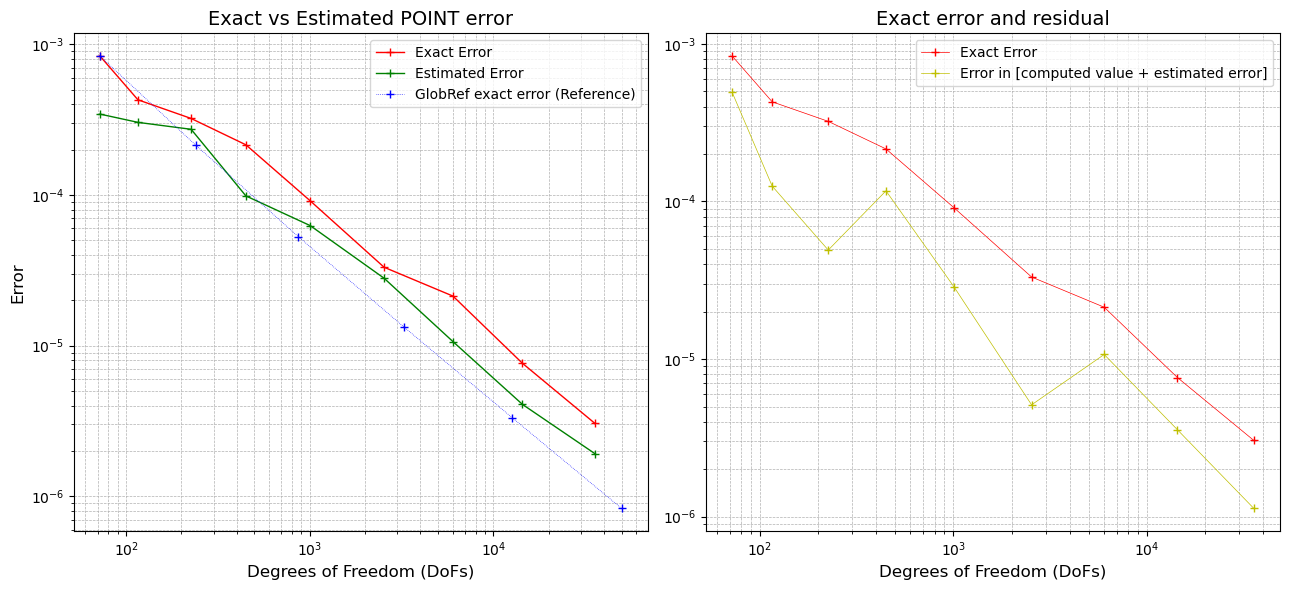

In [30]:
make_plots("./results/config-3/convergence_results.csv","./results/config-1/convergence_results.csv")

### config-4

GO with optimize strategy

   cycle  cells   DoFs     ex POINT err               L2               H1  \
0      0     48     72 8.3787785397e-04 9.6683253800e-03 1.1278931218e-01   
1      1     96    130 2.7571935019e-04 8.0466055619e-03 9.9178766626e-02   
2      2    216    266 1.8053744718e-04 7.5002179076e-03 9.2828468478e-02   
3      3    306    372 1.9914355556e-04 6.9829560136e-03 8.7849873953e-02   
4      4   1056   1182 6.7834767407e-05 5.7346146516e-03 7.4225988636e-02   
5      5   1194   1337 6.3783362734e-05 5.7221641498e-03 7.3838341365e-02   
6      6   4590   4886 1.7362170211e-05 4.1404621331e-03 5.7473173049e-02   
7      7   5010   5330 1.6561493142e-05 4.1238987994e-03 5.7075273452e-02   
8      8  19578  20274 4.3336192930e-06 1.0171085728e-03 2.8386184461e-02   

      std FLUX err          est err   Cons. FLUX err  
0 3.8822856765e-01 3.4466346643e-04 4.8528600000e-01  
1 4.6157142936e-01 1.5693054108e-04 5.5169800000e-01  
2 5.0776111135e-01 1.4194857622e-04 5.8978600000e-01  
3 5.33670

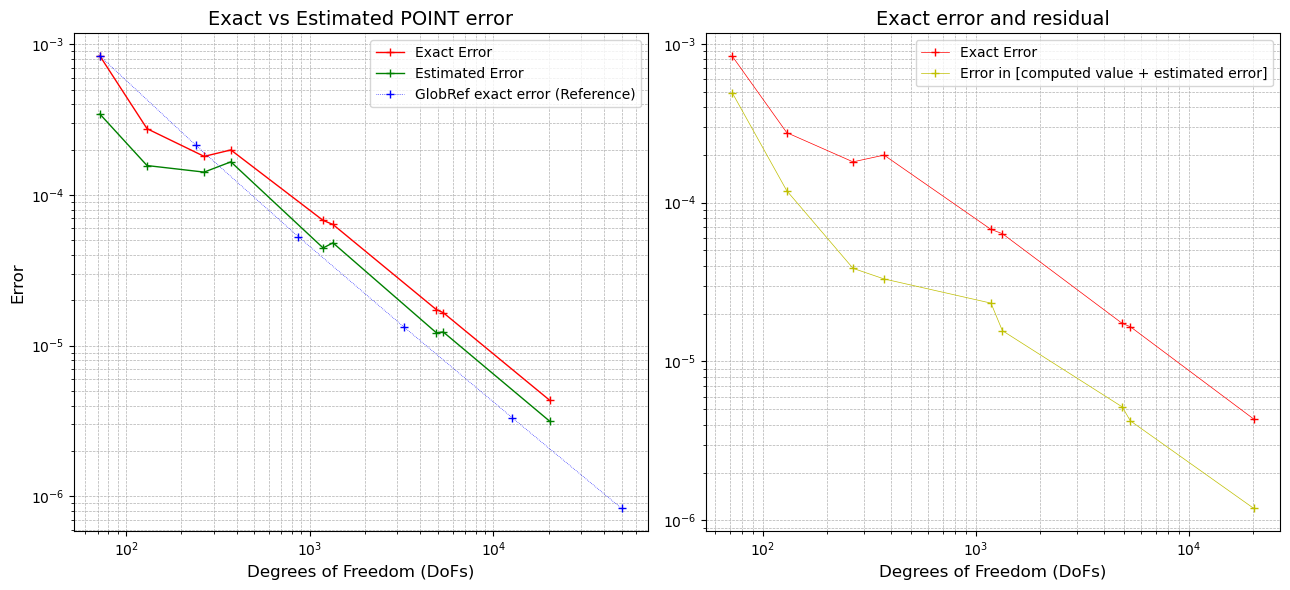

In [31]:
make_plots("./results/config-4/convergence_results.csv","./results/config-1/convergence_results.csv")

## Manifold also on internal cells

Config 5 to 7

### config-6

   cycle   cells    DoFs     ex POINT err               L2               H1  \
0      0      48      72 8.3787785397e-04 9.6683253800e-03 1.1278931218e-01   
1      1     192     240 2.1528447083e-04 2.4773103872e-03 5.6977302321e-02   
2      2     768     864 5.3824018266e-05 6.2277990788e-04 2.8557554182e-02   
3      3    3072    3264 1.3447333194e-05 1.5589253309e-04 1.4286658203e-02   
4      4   12288   12672 3.3594807850e-06 3.8984900054e-05 7.1442724178e-03   
5      5   49152   49920 8.3963707000e-07 9.7469422890e-06 3.5722516412e-03   
6      6  196608  198144 2.0989318200e-07 2.4367798340e-06 1.7861400988e-03   

      std FLUX err          est err   Cons. FLUX err  
0 3.8822856765e-01 3.4466346643e-04 4.8528600000e-01  
1 6.2962454592e-01 1.0037164872e-04 7.0832800000e-01  
2 7.6651216259e-01 2.6488593804e-05 8.1417200000e-01  
3 8.3890764402e-01 6.7427751080e-06 8.6492300000e-01  
4 8.7618995103e-01 1.6978808350e-06 8.8975900000e-01  
5 8.9511573003e-01 4.2597595500e-07 9

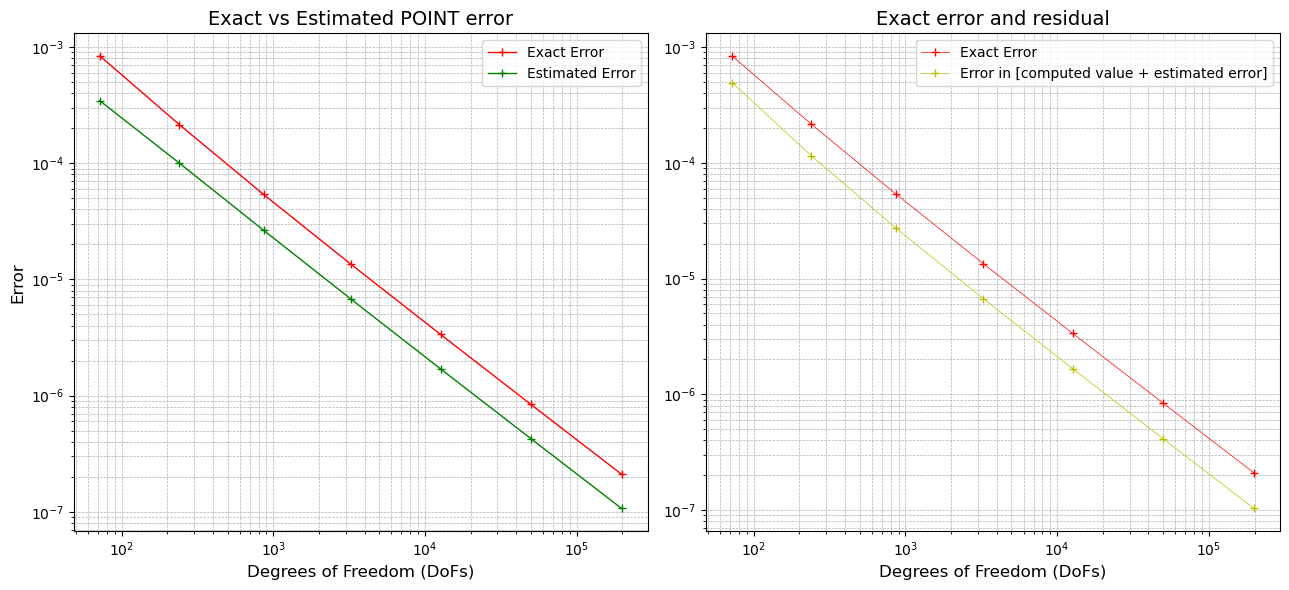

In [20]:
make_plots("./results/config-6/convergence_results.csv")

### config-7

    cycle   cells    DoFs     ex POINT err               L2               H1  \
0       0      48      72 8.3787785397e-04 9.6683253800e-03 1.1278931218e-01   
1       1      84     116 4.2878078781e-04 8.4880770954e-03 1.0308581996e-01   
2       2     180     226 3.1386704853e-04 7.9824353113e-03 9.7518479296e-02   
3       3     360     438 2.2610276013e-04 6.9735138783e-03 8.7458897270e-02   
4       4     885    1014 8.7427780229e-05 6.3623841299e-03 8.0442051415e-02   
5       5    2286    2541 3.3909791947e-05 5.0027155588e-03 6.6571248858e-02   
6       6    5616    6072 1.9345434789e-05 3.0927869601e-03 4.8464351165e-02   
7       7   13683   14439 7.7415950660e-06 2.8905523208e-03 4.4280091159e-02   
8       8   34131   35691 2.9532238590e-06 7.2019239506e-04 2.2438010163e-02   
9       9   81312   84287 1.1150914600e-06 4.3305763252e-04 1.6829423231e-02   
10     10  192000  196939 4.9432671300e-07 3.9210103841e-04 1.2947752199e-02   
11     11  454824  465366 2.3300075900e-

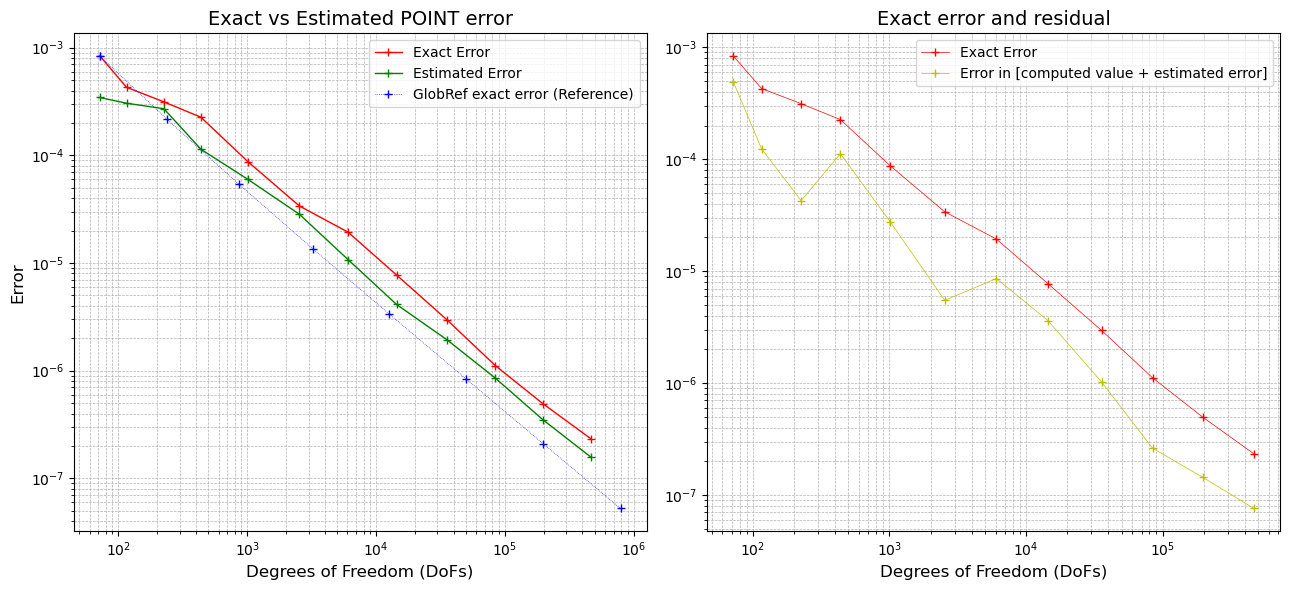

In [37]:
make_plots("./results/config-7/convergence_results.csv","./results/config-5/convergence_results.csv")

### config-8

   cycle  cells   DoFs     ex POINT err               L2               H1  \
0      0     48     72 8.3787785397e-04 9.6683253800e-03 1.1278931218e-01   
1      1     96    130 2.7679118284e-04 8.0475077577e-03 9.9182461299e-02   
2      2    216    266 1.7928925294e-04 7.4999325231e-03 9.2832972938e-02   
3      3    306    372 1.9567805964e-04 6.9822266514e-03 8.7837169683e-02   
4      4   1056   1182 6.6593874689e-05 5.7298740985e-03 7.4178576150e-02   
5      5   1188   1329 6.3986218882e-05 5.7191775159e-03 7.3810250681e-02   
6      6   4548   4836 1.7974932539e-05 4.1365538294e-03 5.7480589264e-02   
7      7   4992   5310 1.7214317903e-05 4.1360145556e-03 5.7417384445e-02   
8      8  19500  20206 4.4808308590e-06 1.0190771798e-03 2.8419944217e-02   
9      9  75396  77311 1.1405184680e-06 2.8327800034e-04 1.4862721419e-02   

      std FLUX err          est err   Cons. FLUX err  
0 3.8822856765e-01 3.4466346643e-04 4.8528600000e-01  
1 4.6063462490e-01 1.5916056149e-04 5.5080

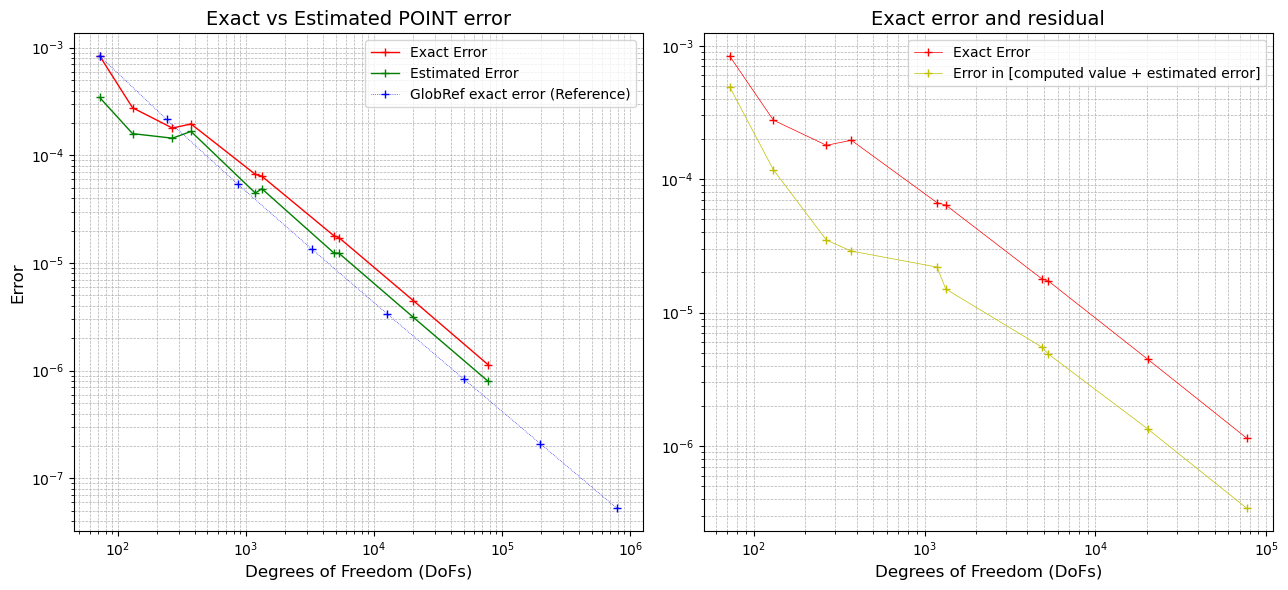

In [25]:
make_plots("./results/config-8/convergence_results.csv","./results/config-5/convergence_results.csv")

## Mapping Q2 - manifold everywhere

Config 9 to 12

### config-10

   cycle  cells   DoFs     ex POINT err               L2               H1  \
0      0     48     72 3.0577467609e-04 9.1228023787e-03 1.1287577772e-01   
1      1    192    240 9.6164438538e-05 2.3147394104e-03 5.6692003476e-02   
2      2    768    864 2.7539115745e-05 5.8352227040e-04 2.8448385570e-02   
3      3   3072   3264 7.3392078130e-06 1.4649675126e-04 1.4254009874e-02   
4      4  12288  12672 1.8916916010e-06 3.6705399972e-05 7.1354013768e-03   
5      5  49152  49920 4.8015311500e-07 9.1868759980e-06 3.5699427873e-03   

      std FLUX err          est err   Cons. FLUX err  
0 3.9269779534e-01 3.0039394356e-04 4.9086900000e-01  
1 6.3301258432e-01 9.5989732654e-05 7.1198100000e-01  
2 7.6742260937e-01 2.7559290788e-05 8.1509300000e-01  
3 8.3914424751e-01 7.3428252350e-06 8.6515400000e-01  
4 8.7625030726e-01 1.8920961250e-06 8.8981700000e-01  
5 8.9513097537e-01 4.8018769100e-07 9.0205700000e-01  


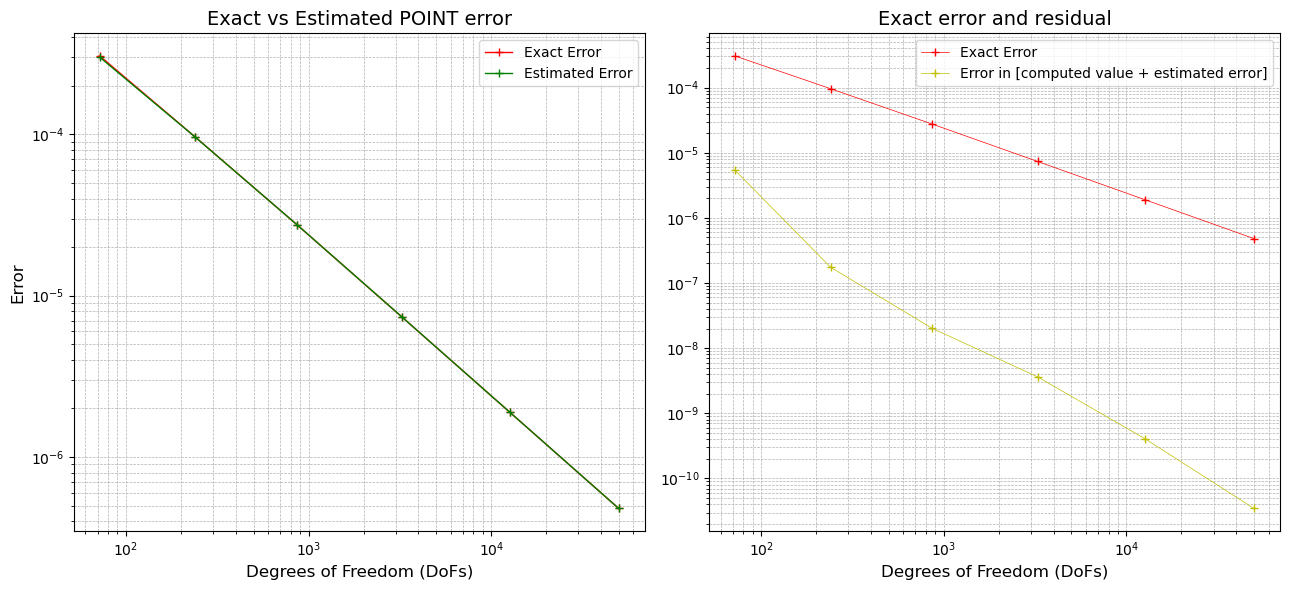

In [26]:
make_plots("./results/config-10/convergence_results.csv")

### config-11

    cycle   cells    DoFs     ex POINT err               L2               H1  \
0       0      48      72 3.0577467609e-04 9.1228023787e-03 1.1287577772e-01   
1       1      84     116 3.0158440896e-04 8.0162124670e-03 1.0310698844e-01   
2       2     192     240 2.2722608141e-04 7.1011905223e-03 9.3368657603e-02   
3       3     372     456 1.1457410851e-04 6.9637445468e-03 9.1623581590e-02   
4       4     894    1026 6.1603330800e-05 6.0075898402e-03 8.0398847456e-02   
5       5    2313    2567 2.9000303571e-05 4.7270910541e-03 6.6551681631e-02   
6       6    5694    6138 1.0990882330e-05 2.9781019170e-03 4.9401365146e-02   
7       7   13695   14459 4.2110153160e-06 2.4837890835e-03 4.2891468873e-02   
8       8   34665   36247 1.9070259740e-06 6.1999847813e-04 2.2182306008e-02   
9       9   82566   85508 8.3529379100e-07 4.2848567868e-04 1.7177104979e-02   
10     10  194178  199159 3.4334196300e-07 3.2244190985e-04 1.2988723947e-02   

       std FLUX err          est err   

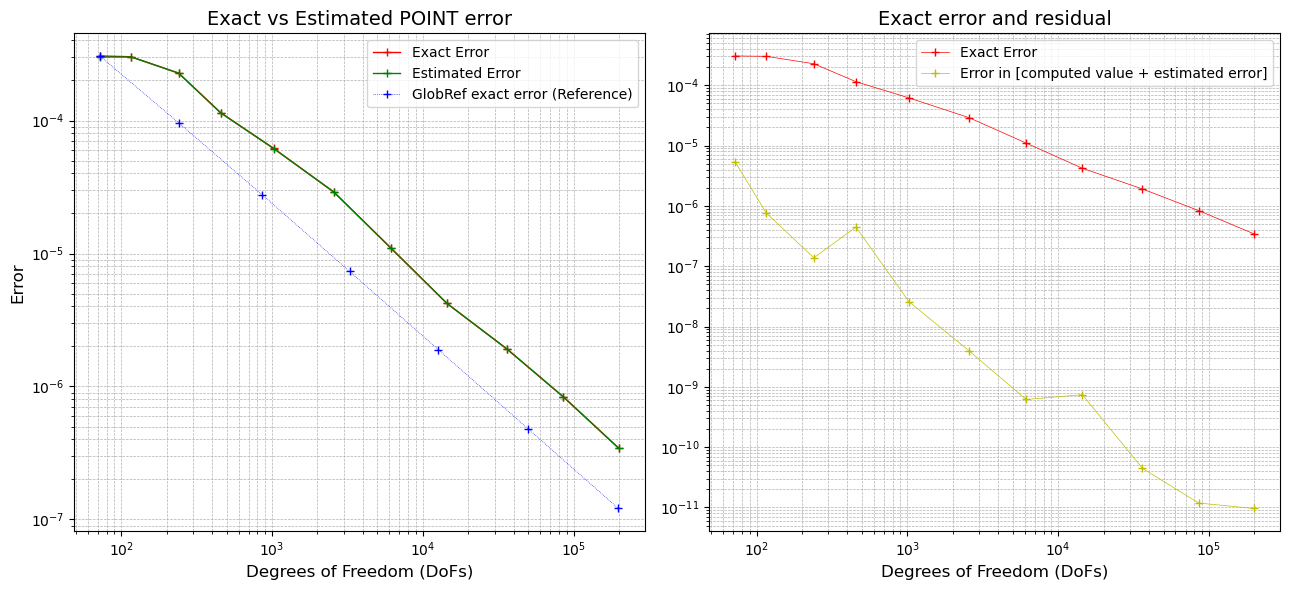

In [39]:
make_plots("./results/config-11/convergence_results.csv","./results/config-9/convergence_results.csv")

### config-12

   cycle  cells   DoFs     ex POINT err               L2               H1  \
0      0     48     72 3.0577467609e-04 9.1228023787e-03 1.1287577772e-01   
1      1     96    130 1.5536653004e-04 7.6002919588e-03 9.9182621952e-02   
2      2    216    266 1.4506567882e-04 7.0839948398e-03 9.2833736702e-02   
3      3    306    372 1.6531130495e-04 6.5957422897e-03 8.7819523482e-02   
4      4   1056   1182 4.4262565921e-05 5.4120245237e-03 7.4140397851e-02   
5      5   1188   1329 4.8603598782e-05 5.4037838423e-03 7.3777656665e-02   
6      6   4554   4844 1.2407219283e-05 3.9131007143e-03 5.7411090753e-02   
7      7   5010   5332 1.2248190397e-05 2.9951766766e-03 4.9923380152e-02   
8      8  19554  20270 3.1242745530e-06 8.5560373374e-04 2.6941078189e-02   
9      9  75564  77517 7.9757804800e-07 2.4365644052e-04 1.4468578458e-02   

      std FLUX err          est err   Cons. FLUX err  
0 3.9269779534e-01 3.0039394356e-04 4.9086900000e-01  
1 4.6484322770e-01 1.5500038022e-04 5.5583

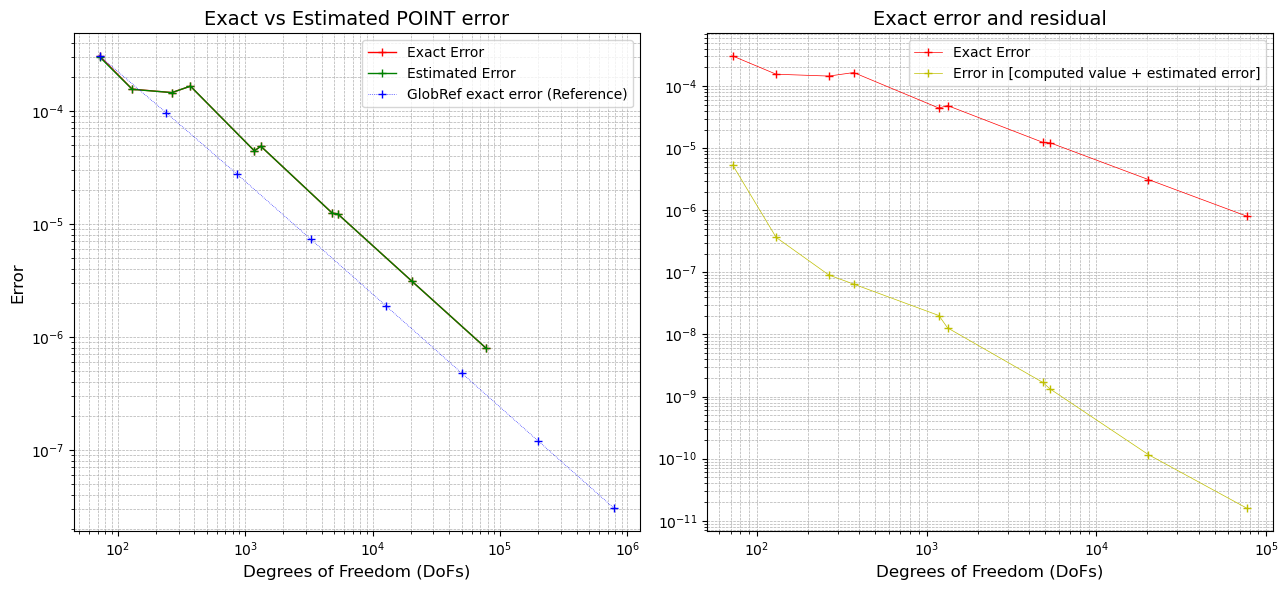

In [36]:
make_plots("./results/config-12/convergence_results.csv","./results/config-9/convergence_results.csv")

## Comparisons

config-7 vs config-11

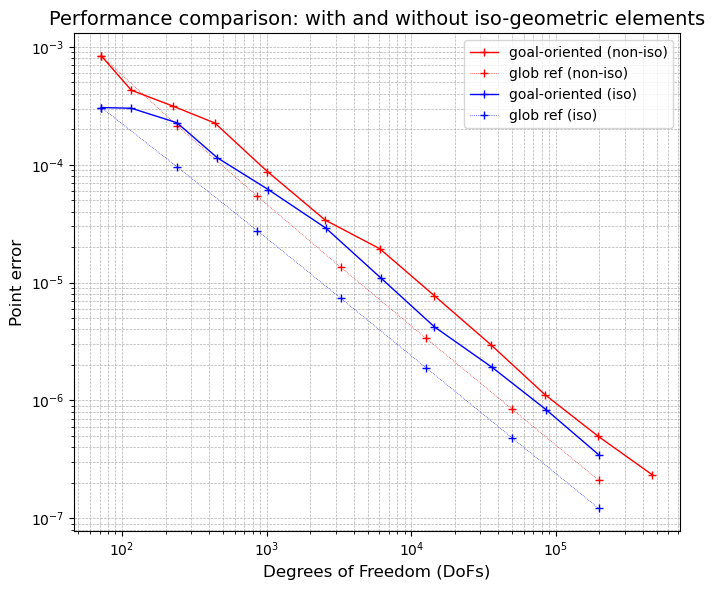

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

non_iso_file_name = "./results/config-7/convergence_results.csv"
non_iso_reference_file_name = "./results/config-5/convergence_results.csv"
iso_file_name = "./results/config-11/convergence_results.csv"
iso_reference_file_name = "./results/config-9/convergence_results.csv"

data = pd.read_csv(non_iso_file_name)
reference_data = pd.read_csv(non_iso_reference_file_name)

iso_data = pd.read_csv(iso_file_name)
iso_reference_data = pd.read_csv(iso_reference_file_name)


plt.figure(figsize=(7, 6))  # Adjust the figure size for two plots

plt.subplot(1, 1, 1)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['ex POINT err'],"r-+", linewidth=1.0, label='goal-oriented (non-iso)')
plt.loglog(reference_data['DoFs'], reference_data['ex POINT err'],"r:+", linewidth=0.5, label='glob ref (non-iso)')

plt.loglog(iso_data['DoFs'], iso_data['ex POINT err'],"b-+", linewidth=1.0, label='goal-oriented (iso)')
plt.loglog(iso_reference_data['DoFs'], iso_reference_data['ex POINT err'],"b:+", linewidth=0.5, label='glob ref (iso)')

plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Point error', fontsize=12)
plt.title('Performance comparison: with and without iso-geometric elements', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()